In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [48]:
# Read data (FOR NOW GENERATE PSEUDO RANDOM NORMAL SEQUENCE)
xi = np.array([np.arange(10)])

# Define number of distributions
K = xi.shape[0]

# Define number of atoms per sample
N = xi.shape[1]

# Define probability matrix
pi = (1/N)*np.ones(N)

print(K, N)

1 10


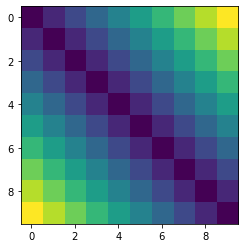

In [41]:
c = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        c[i,j] = np.sqrt( (xi[0, i] - xi[0, j])**2)
 
plt.imshow(c)

In [53]:
# Dec Var
T =[cp.Variable((N, N)) for k in range(K)]
epsilon = cp.Variable((1, 1))
p = cp.Variable((N))

# Obj
obj = cp.Minimize(epsilon)


# Cons
for k in range(K):
    cons = [T[k] >= 0]
    cons.append(cp.trace(T[k]@c) <= epsilon)
    cons.append(T[k]@np.ones(N) == p)
    cons.append(T[k].T@np.ones(N) == pi[k])

# Solve program
problem = cp.Problem(obj, cons)
problem.solve()

-1.1753921054614682e-11

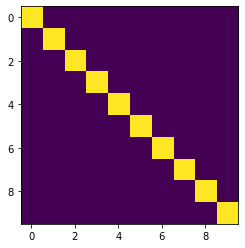

In [39]:
plt.imshow(T.value)

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

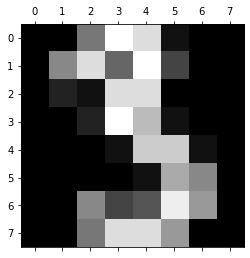

In [45]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[3])

In [46]:
digits.shape

AttributeError: shape